# K-Means Clustering and Random Forest Algorithm for the TMDB Movie Dataset.

Social media marketing is a great influencer for a movie success. IMDB evaluates the success of a movie and assigns scores from 1 to 10. IMDB is an online database for information related to movies and it is a good benchmark to understand if a movie is worth spending money on.

This tutorial showes how social media attributes like number of likes on pages of actors and director of a movie dictate its IMDB score. K-means clustering was applied for segmenting the audience based on variables like the number of likes of actors and movies and, also, Random Forest algorithm was used to predict IMDB score based on the Facebook pages of directors, actors and the movie.
____
This work was done by students of the University of the West of Scotland, MSc "Big Data"

Arun Suresh
ELizaveta Poluboiarinova

## Dataset. Preprocessing.

The dataset "TMDB 5000 Movie Dataset" was taken from Kaggle:
https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv

The original dataset contains 4920 values with 28 attributes such as:

- IMDB votes
- reviews users
- budget
- gross and etc.

Since the focus is on the social media impact, these columns that are not related to the solution of the problem were removed as well as the values of type NA.

```sh
drops <- c(“color",“director_names","num_critic_for_reviews", “duration”,“actor_2_name”,“gross”,“genres”,“actor_1_name”, “movie_title”,“num_voted_users”,“actor_3_name”, “facenumber_in_poster”,“plot_keywords”, “movie_imdb_link”,“num_user_for_reviews”,“language”,“country”,“content_rating”,“budget”, “title_year”, “aspect_ratio”)

movies <- movies [,!(names(movies) %in% drops)]
movie <- na.omit(movies)
```



In [19]:
#Let's have a look on our dataset
movie <- read.csv('movie.csv')
head(movie)

director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,imdb_score
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
0,855,1000,4834,936,33000,7.9
563,1000,40000,48350,5000,0,7.1
0,161,11000,11700,393,85000,6.8
22000,23000,27000,106759,23000,164000,8.5
475,530,640,1873,632,24000,6.6
0,4000,24000,46055,11000,0,6.2


In [20]:
names(movie)

[1] "director_facebook_likes"   "actor_3_facebook_likes"   
[3] "actor_1_facebook_likes"    "cast_total_facebook_likes"
[5] "actor_2_facebook_likes"    "movie_facebook_likes"     
[7] "imdb_score"

## K-means clustering

K-means clustering is one of the simplest algorithms which uses unsupervised learning method to solve known clustering issues. 

In [21]:
smple <- movie[sample(nrow(movie),500),] #let's take only first 500 values for analysis
smple_short <- smple[c(3,6)] #use the 3rd and 6th rows
head(smple_short)

,actor_1_facebook_likes,movie_facebook_likes
,<int>,<int>
891,18000,21000
829,3000,0
3910,385,453
4414,14,131
3182,11000,376
4171,85,11000


In [22]:
smple_matrix <- data.matrix(smple_short)
head(smple_matrix)

,actor_1_facebook_likes,movie_facebook_likes
891,18000,21000
829,3000,0
3910,385,453
4414,14,131
3182,11000,376
4171,85,11000


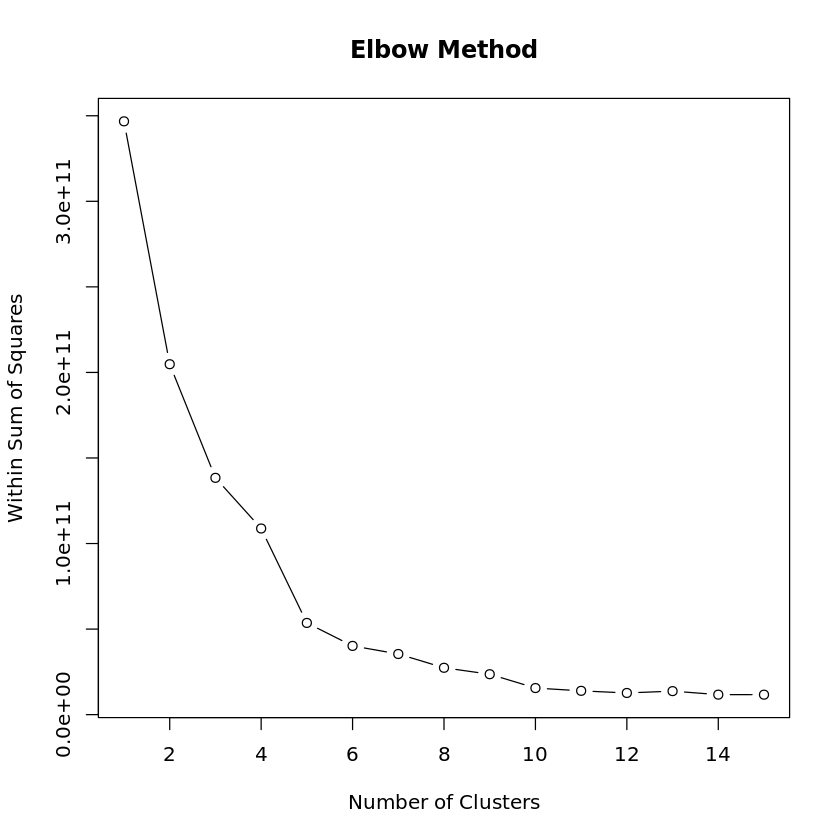

In [23]:
 #let's determine the number of clusters
wss <- (nrow(smple_matrix)-1)*sum(apply(smple_matrix,2,var))

for (i in 2:15)
  wss[i]<-sum(kmeans(smple_matrix,centers=i)$withinss)
plot(1:15,wss, type = 'b',
     main = "Elbow Method",
     xlab = "Number of Clusters", 
     ylab = "Within Sum of Squares" )

The sudden drop occured in k = 5. It let us make an assumption that we can use 5 classes for segmentation. Indeed, as shown below, (between_SS / total_SS =  84.6 %) - it is a measure of the total variance in the dataset. 

There is in-built function named “k-means” in R for forming clusters. Once we randomly initialized 5 points, called cluster centroids, then we move the center of gravity of each point to the average value of the data points. Then we optimized these values until they became static. 

As a result, we got the optimized centroids. Further, we could examine how founded clusters suit to IMDb score and director Facebook likes by using aggregation function. The cluster 5 has the highest IMDB score and least director Facebook likes. The likes of the main actor are playing a crucial role in determining the IMDb score.

In [24]:
cl <- kmeans(smple_matrix,5,nstart=25)
cl

K-means clustering with 5 clusters of sizes 372, 1, 6, 44, 77

Cluster means:
  actor_1_facebook_likes movie_facebook_likes
1               2364.906             1961.597
2             260000.000              706.000
3              15666.667           154666.667
4              11932.545            44250.000
5              22805.195             9270.818

Clustering vector:
 891  829 3910 4414 3182 4171 3979 4122  520 1941 2365 1387 2027 2356 4771  683 
   5    1    1    1    1    1    1    1    5    1    1    4    1    1    1    4 
4486 1068 4919 4822 2433  606  142 2242 4744 3989  576 1919 4012 3964 3708 4901 
   1    1    1    1    1    1    4    1    1    1    1    1    1    1    1    1 
1779 1816  461 2132 1492 2994 2842 3133 3671  248 4459 1850 2519 1704 4068   93 
   1    1    1    1    1    1    5    1    1    4    1    1    1    1    1    4 
1587 1965 3928 1103 2666 1457 4178 1617 2237 3012 2168 4383  300   11 4337  154 
   4    4    1    1    5    1    4    1    1    1    5    1

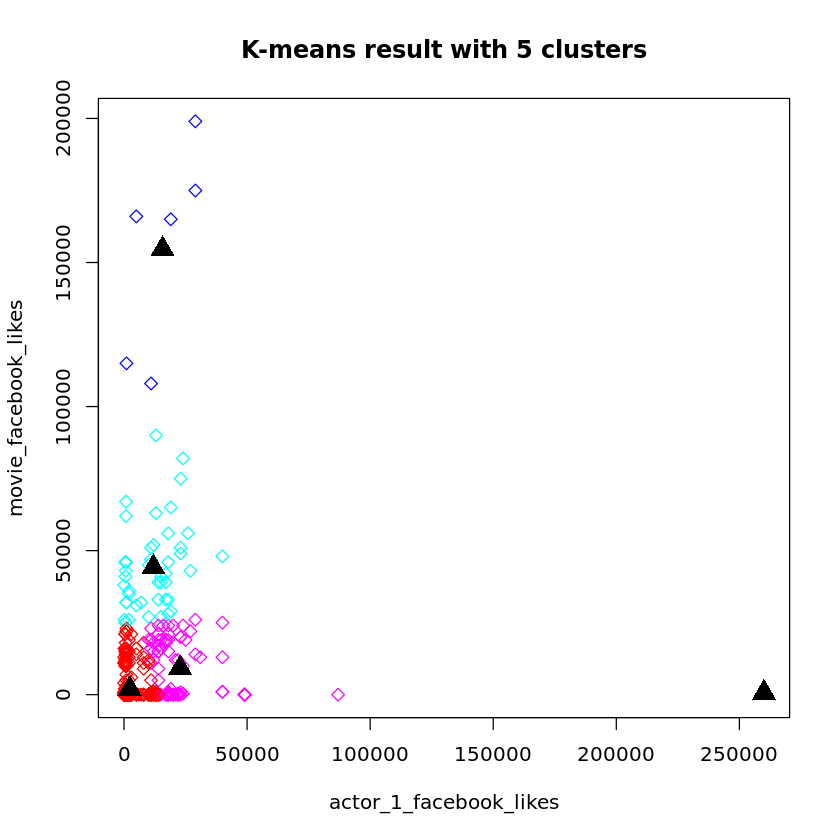

In [25]:
plot(smple_matrix, 
     col =(cl$cluster +1), 
     main = "K-means result with 5 clusters",
     pch=5, cex=1,las=0)

points(cl$centers, 
       col = "black", 
       pch =17, cex = 2)

In [26]:
cl$centers

actor_1_facebook_likes,movie_facebook_likes
2364.906,1961.597
260000.000,706.000
15666.667,154666.667
11932.545,44250.000
22805.195,9270.818


In [27]:
#using aggregation function we could look at other parameters of the data
a <- aggregate(data = smple, director_facebook_likes ~ cl$cluster, mean)
a

cl$cluster,director_facebook_likes
<int>,<dbl>
1,387.5511
2,74.0000
3,6434.3333
4,830.1818
5,880.9870


In [28]:
b <- aggregate(data = smple, imdb_score ~ cl$cluster, mean)
b

cl$cluster,imdb_score
<int>,<dbl>
1,6.315860
2,5.600000
3,8.450000
4,6.950000
5,6.509091


## Random Forest 

#### Why Random Forest?
- Random forest is developed by aggregating trees. 

- Random forest avoids overfitting and can handle a large number of variables or features. It can help for feature selection based on variable important.

- Random Forest is user-friendly it only deals with 2 free parameters:

    - no of trees (default is 500)
    - variables random selected as a candidate at each split (mtry)

#### Aim:
- to predict IMDB score based on the Facebook pages of directors, actors and movie.

IMDb score attribute is categorical. The first step is to convert the categorical data into factorial. We need to multiply the scores with 10 to get a range between 1-100

In [29]:
movie$imdb_score<- movie$imdb_score*10
movie$imdb_score<-as.numeric(movie$imdb_score)

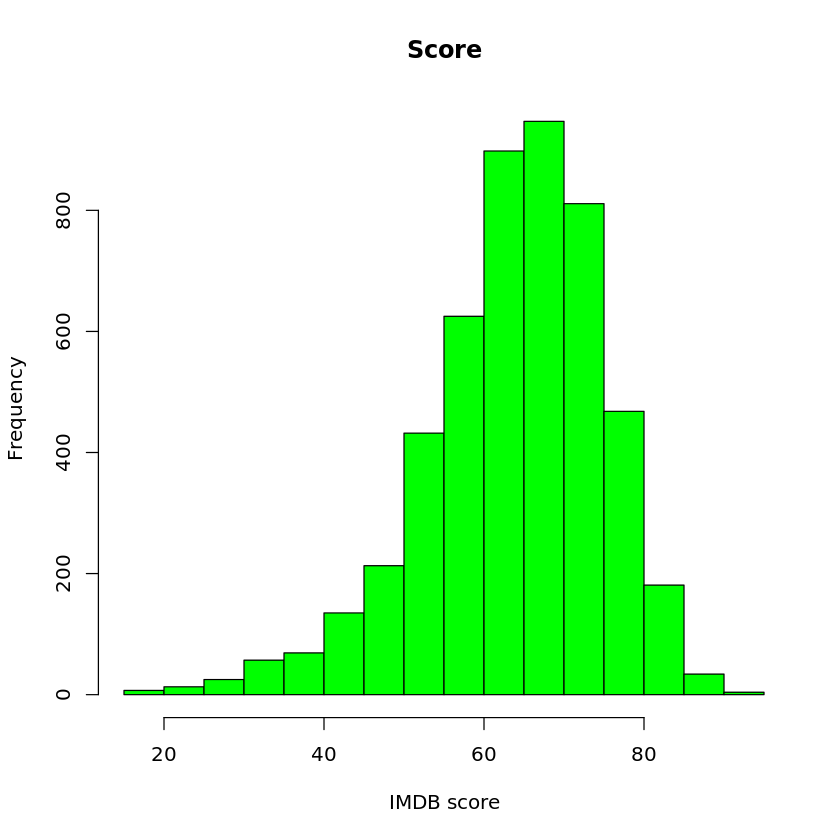

In [30]:
hist(movie$imdb_score,breaks = 25, 
     main = "Score", 
     col = "green",
     xlab = "IMDB score")

Distribution of number of nodes for trees. 

Then we need to cut of data is based on the score’s frequency:

- 0-66= Bad
- 66-100=Good

In [31]:
movie$imdb_score <-cut(movie$imdb_score,breaks = c(0,66,100),labels = c("Bad","Good"))

In [32]:
movie$director_facebook_likes<-as.numeric(movie$director_facebook_likes)
movie$actor_1_facebook_likes<- as.numeric(movie$actor_1_facebook_likes)
movie$actor_2_facebook_likes<- as.numeric(movie$actor_2_facebook_likes)
movie$actor_3_facebook_likes<- as.numeric(movie$actor_3_facebook_likes)
movie$cast_total_facebook_likes<- as.numeric(movie$cast_total_facebook_likes)
movie$imdb_score<- as.factor(movie$imdb_score)

In [33]:
set.seed(124) #random seed to make the experiment repeatable

In [34]:
#installing libraries

library(lattice)
library(ggplot2)
#install.packages('caret', dependencies = TRUE, repos = "http://cran.rstudio.com")
#install.packages("e1071")
library(caret)
library(e1071)
library(randomForest)

In [35]:
#use stratified split between train and test data to ensure that 
#uniform data are present across the board.

train.index <- createDataPartition(movie$imdb_score, p = .7, list = FALSE)
train <- movie[ train.index,]
test  <- movie[-train.index,]

In [36]:
str(train)

'data.frame':	3444 obs. of  7 variables:
 $ director_facebook_likes  : num  0 0 22000 475 0 15 0 282 0 395 ...
 $ actor_3_facebook_likes   : num  855 161 23000 530 4000 284 19000 10000 903 393 ...
 $ actor_1_facebook_likes   : num  1000 11000 27000 640 24000 799 26000 25000 18000 451 ...
 $ cast_total_facebook_likes: num  4834 11700 106759 1873 46055 ...
 $ actor_2_facebook_likes   : num  936 393 23000 632 11000 553 21000 11000 10000 412 ...
 $ movie_facebook_likes     : int  33000 85000 164000 24000 0 29000 118000 10000 0 0 ...
 $ imdb_score               : Factor w/ 2 levels "Bad","Good": 2 2 2 1 1 2 2 2 1 2 ...


In [37]:
str(test)

'data.frame':	1475 obs. of  7 variables:
 $ director_facebook_likes  : num  563 0 563 0 0 532 0 0 258 368 ...
 $ actor_3_facebook_likes   : num  1000 2000 1000 19000 773 627 393 4000 326 988 ...
 $ actor_1_facebook_likes   : num  40000 15000 40000 26000 5000 14000 883 24000 16000 23000 ...
 $ cast_total_facebook_likes: num  48350 24450 48486 87697 9152 ...
 $ actor_2_facebook_likes   : num  5000 4000 5000 21000 972 10000 563 11000 368 3000 ...
 $ movie_facebook_likes     : int  0 197000 5000 123000 65000 44000 80000 0 24000 0 ...
 $ imdb_score               : Factor w/ 2 levels "Bad","Good": 2 2 2 2 2 1 2 2 1 1 ...


In [38]:
head(train)

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,imdb_score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,0,855,1000,4834,936,33000,Good
3,0,161,11000,11700,393,85000,Good
4,22000,23000,27000,106759,23000,164000,Good
5,475,530,640,1873,632,24000,Bad
6,0,4000,24000,46055,11000,0,Bad
7,15,284,799,2036,553,29000,Good


In [39]:
set.seed(273)

In [40]:
#We are trying train model to predict an IMDB score (good or bad) 
#based on the social media factors (6 features)

rf<-randomForest(imdb_score~
                     director_facebook_likes+
                     actor_1_facebook_likes+
                     actor_3_facebook_likes+
                     actor_2_facebook_likes+
                     cast_total_facebook_likes+
                     movie_facebook_likes,
                     data = train)

In [41]:
print(rf)


Call:
 randomForest(formula = imdb_score ~ director_facebook_likes +      actor_1_facebook_likes + actor_3_facebook_likes + actor_2_facebook_likes +      cast_total_facebook_likes + movie_facebook_likes, data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 33.42%
Confusion matrix:
      Bad Good class.error
Bad  1339  530   0.2835741
Good  621  954   0.3942857


Looking at the output file we note that predicting Good score has a higher error rate close to 40% compared to Bad class at 28% this also evident in the confusion matrix of the train data. 

We can check the attributes of random forest form the function 
attributes(rf), 

rf$confusion is an attribute that we checked here. 


In [42]:
attributes(rf)

$names
 [1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

In [43]:
rf$confusion

,Bad,Good,class.error
Bad,1339,530,0.2835741
Good,621,954,0.3942857


In [45]:
p1<-predict(rf,train)
head(p1)

1    3    4    5    6    7 
Good Good Good  Bad  Bad Good 
Levels: Bad Good

In [46]:
head(train$imdb_score)

[1] Good Good Good Bad  Bad  Good
Levels: Bad Good

In [47]:
confusionMatrix(p1,train$imdb_score)

Confusion Matrix and Statistics

          Reference
Prediction  Bad Good
      Bad  1867    0
      Good    2 1575
                                          
               Accuracy : 0.9994          
                 95% CI : (0.9979, 0.9999)
    No Information Rate : 0.5427          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9988          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 0.9989          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9987          
             Prevalence : 0.5427          
         Detection Rate : 0.5421          
   Detection Prevalence : 0.5421          
      Balanced Accuracy : 0.9995          
                                          
       'Positive' Class : Bad             
                        

In [ ]:
r <- confusionMatrix(p1,train$imdb_score) #Sensitivity correct classification of all classes


In [50]:
p2 <- predict(rf,test)
confusionMatrix(p2,test$imdb_score)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad  583  272
      Good 218  402
                                          
               Accuracy : 0.6678          
                 95% CI : (0.6431, 0.6918)
    No Information Rate : 0.5431          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.3264          
                                          
 Mcnemar's Test P-Value : 0.01665         
                                          
            Sensitivity : 0.7278          
            Specificity : 0.5964          
         Pos Pred Value : 0.6819          
         Neg Pred Value : 0.6484          
             Prevalence : 0.5431          
         Detection Rate : 0.3953          
   Detection Prevalence : 0.5797          
      Balanced Accuracy : 0.6621          
                                          
       'Positive' Class : Bad             
                           

In [51]:
p <- confusionMatrix(p2,test$imdb_score)
capture.output(p, file = "confusionMatrix_test.txt")

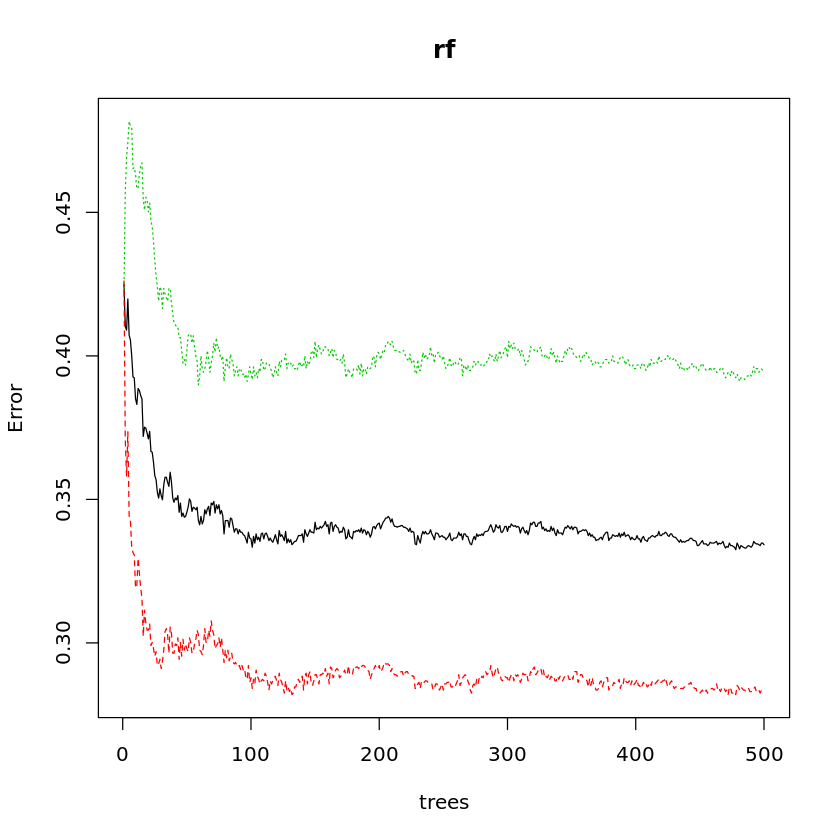

In [52]:
plot(rf)

Error rate in the random forest model. 

In [53]:
rf <- randomForest( imdb_score~
                    director_facebook_likes+
                    actor_1_facebook_likes+
                    actor_3_facebook_likes+
                    actor_2_facebook_likes+
                    cast_total_facebook_likes+
                    movie_facebook_likes,
                  data = train, 
                  ntree=300,
                  mtry =6,
                  importance=TRUE,
                  proximity = TRUE)
print(rf)


Call:
 randomForest(formula = imdb_score ~ director_facebook_likes +      actor_1_facebook_likes + actor_3_facebook_likes + actor_2_facebook_likes +      cast_total_facebook_likes + movie_facebook_likes, data = train,      ntree = 300, mtry = 6, importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 6

        OOB estimate of  error rate: 33.48%
Confusion matrix:
      Bad Good class.error
Bad  1317  552   0.2953451
Good  601  974   0.3815873


In [54]:
p2 <- predict(rf,test)

In [55]:
confusionMatrix(p2,test$imdb_score)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad  575  270
      Good 226  404
                                         
               Accuracy : 0.6637         
                 95% CI : (0.639, 0.6878)
    No Information Rate : 0.5431         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.3189         
                                         
 Mcnemar's Test P-Value : 0.05351        
                                         
            Sensitivity : 0.7179         
            Specificity : 0.5994         
         Pos Pred Value : 0.6805         
         Neg Pred Value : 0.6413         
             Prevalence : 0.5431         
         Detection Rate : 0.3898         
   Detection Prevalence : 0.5729         
      Balanced Accuracy : 0.6586         
                                         
       'Positive' Class : Bad            
                                         

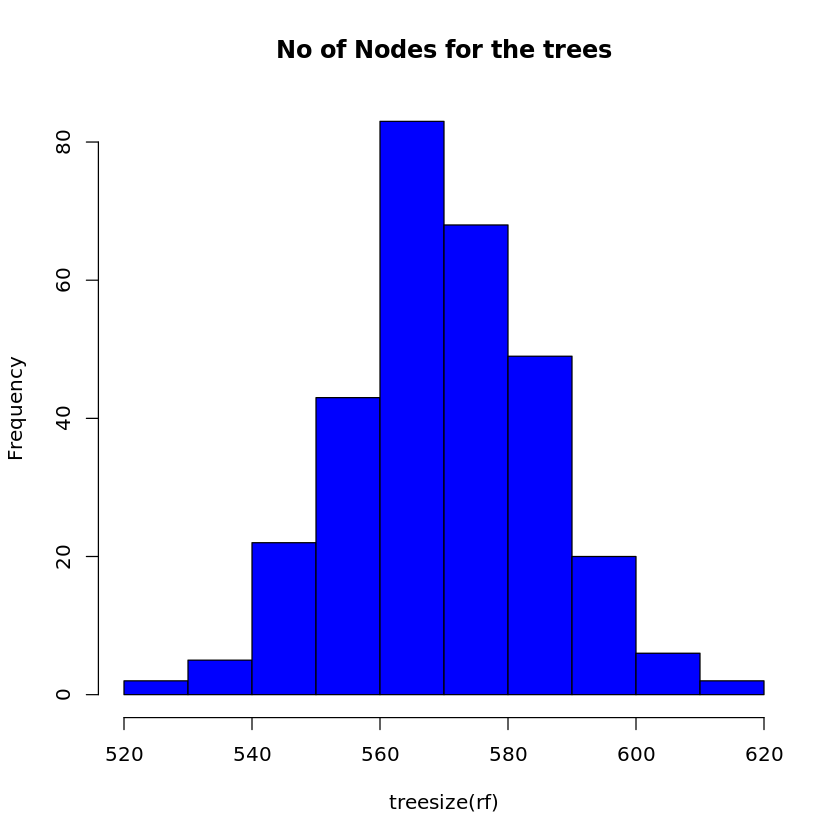

In [56]:
hist(treesize(rf), main = "No of Nodes for the trees", col = "blue")


Histogram of IMBd score frequency. Max number of values are between 60 and 80. 

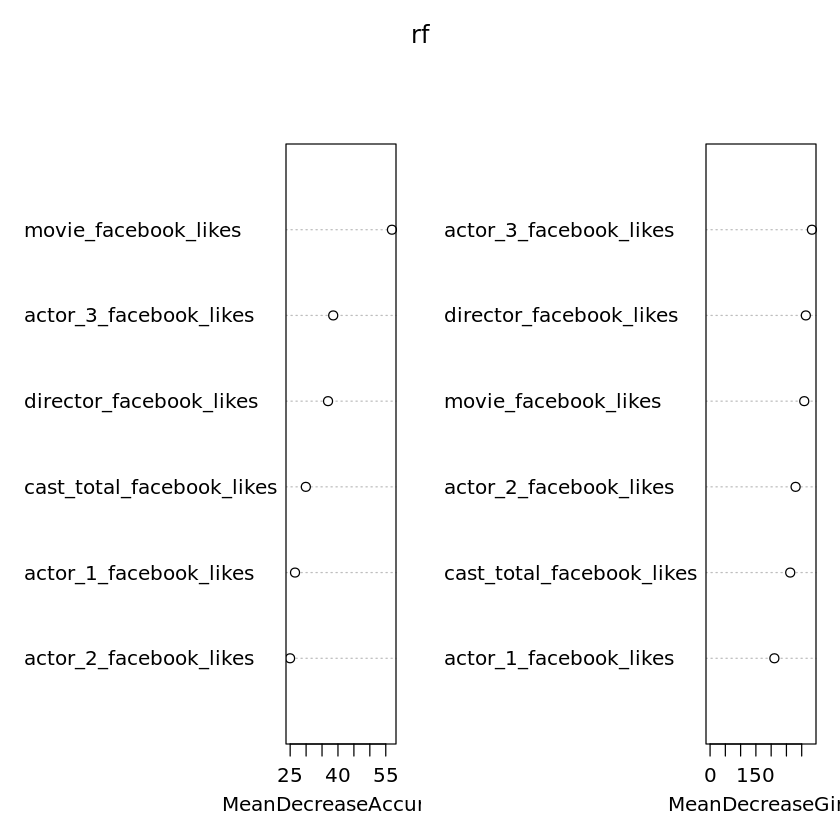

In [57]:
varImpPlot(rf)

VarImp plot show feature and their importance. 

In [60]:
e <- getTree(rf,1,labelVar = 1)
head(e)

left daughter,right daughter,split var,split point,status,prediction
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>
2,3,movie_facebook_likes,5500.0,1,NA
4,5,actor_3_facebook_likes,148.5,1,NA
6,7,movie_facebook_likes,68500.0,1,NA
8,9,director_facebook_likes,512.0,1,NA
10,11,movie_facebook_likes,76.5,1,NA
12,13,actor_3_facebook_likes,98.5,1,NA


Warning message in RColorBrewer::brewer.pal(nlevs, "Set1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

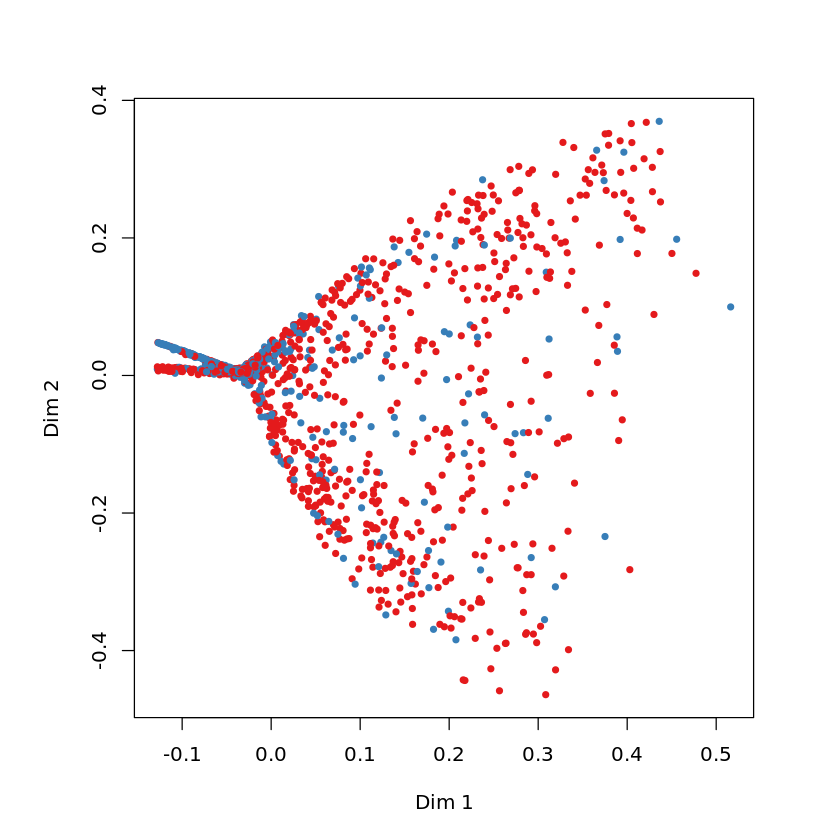

In [61]:
MDSplot(rf,train$imdb_score)


MDSplot showing how Good and Bad responses are distributed.

## Conclusion and further works

The model can predict IMDB scores (Good or Bad) from social attributes with 66% accuracy. The study showed that the IMDB score is influenced the most by the movies Facebook page followed by the director of the movie. These attributes can be concentrated for a focused approach by analysing them in seperated clusters.

## References

[1]    Kaggle, “TMDB 5000 Movie Dataset,” 2017. [Online]. Available: https://www.kaggle.com/tmdb/tmdb-movie-metadata. [Accessed 10 March 2019].

[2]    B. Rai, “Random Forest in R - Classification and Prediction Example with Definition & Steps,” 21 March 2017. [Online]. Available: https://www.youtube.com/watch?v=dJclNIN-TPo. [Accessed 20 March 2019].

[3]    stackoverflow, “stackoverflow,” [Online]. Available: https://stackoverflow.com/. [Accessed March 2019].

[4]    Edureka, “Business Analytics with R,” [Online]. Available: https://www.edureka.co/blog/k-means-clustering-algorithm/. [Accessed 20 March 2019].

[5]    RDocumentation, “https://www.rdocumentation.org/,” [Online]. Available: https://www.rdocumentation.org/packages/caret/versions/4.47/topics/trainControl. [Accessed 20 March 2019].

[6]    community.rstudio, “https://community.rstudio.com/,” [Online]. Available: https://community.rstudio.com/t/caret-installation-error/8100/8. [Accessed 30 March 2019].

[7]    B. Rai, “Support Vector Machine (SVM) with R - Classification and Prediction Example,” [Online]. Available: https://www.youtube.com/watch?v=pS5gXENd3a4&t=237s. [Accessed March 2019].

[8]    B. Rai, “Social Network Analysis with R | Examples,” Youtube, [Online]. Available: https://www.youtube.com/watch?v=0xsM0MbRPGE. [Accessed March 2019].

[9]    P. Halliday, “K Nearest Neighbour with R - Classification Algorithm,” [Online]. Available: https://www.youtube.com/watch?v=WIcuNQEMbuA. [Accessed March 2019].

[10]    bookdown, “bookdown.org,” [Online]. Available: https://bookdown.org/yihui/rmarkdown/document-templates.html. [Accessed March 2019].

[11]    analyticsvidhya.com, “analyticsvidhya.com,” [Online]. Available: https://discuss.analyticsvidhya.com/t/how-to-resolve-error-na-nan-inf-in-foreign-function-call-arg-6-in-knn/7280/2. [Accessed March 2019].

[12]    IMDb, “https://www.imdb.com/,” [Online]. Available: https://www.imdb.com/. [Accessed April 2019].

[13]    stackoverflow.com, “https://stackoverflow.com,” [Online]. Available: https://stackoverflow.com/questions/20776887/stratified-splitting-the-data. [Accessed April 2019].